In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


%matplotlib inline

#Bipartite

In [47]:
df = pd.read_csv('C:/Users/saiki/OneDrive/Desktop/Learning/New folder 4/Bank churn analysis/Data set/Bank Customer Churn Prediction.csv')
data = df
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [48]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921300,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487655,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: xlabel='gender', ylabel='Count'>

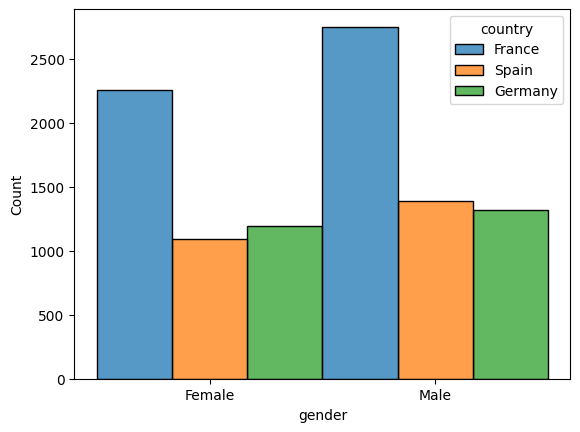

In [49]:
sns.histplot(data=data, x='gender', hue='country',  multiple='dodge',stat='count', )

<Axes: xlabel='gender', ylabel='Count'>

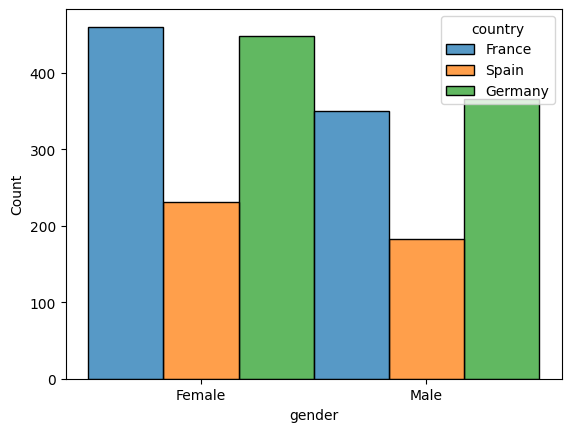

In [50]:
data_churn = data.loc[data['churn']==1]
sns.histplot(data=data_churn, x='gender', hue='country',  multiple='dodge',stat='count')



In [51]:
percentage = (data_churn['gender'].value_counts()/data['gender'].value_counts()) * 100
print(percentage) # this is used for get direct percentage analysis uni variate use

gender
Female    25.071539
Male      16.455928
Name: count, dtype: float64


Numeric Analysis

Correlation

-> +1 postive correlation

-> ~0 no correlation

-> -1 negative correlation


In [55]:
data.corr(numeric_only=True)

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.000000,0.005308,0.009451,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
credit_score,0.005308,1.000000,-0.003994,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,0.009451,-0.003994,1.000000,-0.009960,0.028266,-0.030670,-0.011710,0.085427,-0.007182,0.285351
tenure,-0.014883,0.000842,-0.009960,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.012419,0.006268,0.028266,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.016972,0.012238,-0.030670,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.014025,-0.005458,-0.011710,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.001665,0.025651,0.085427,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,0.015271,-0.001384,-0.007182,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.006248,-0.027094,0.285351,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


From the above correlation matrix we got the insights like age with churn is 0.285351 which is positively corrleated. 

And Balance with Products_number is -0.304180 which is negatively correlated

<Axes: >

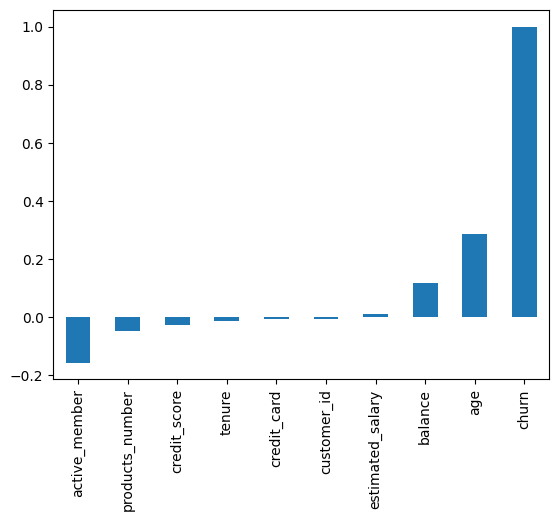

In [59]:
data.corr(numeric_only=True)['churn'].sort_values(ascending = True).plot(kind = 'bar')

From the above correlation bar graph we got insights like

age, balance, products_number, active_members are important factors for churn.

<Axes: >

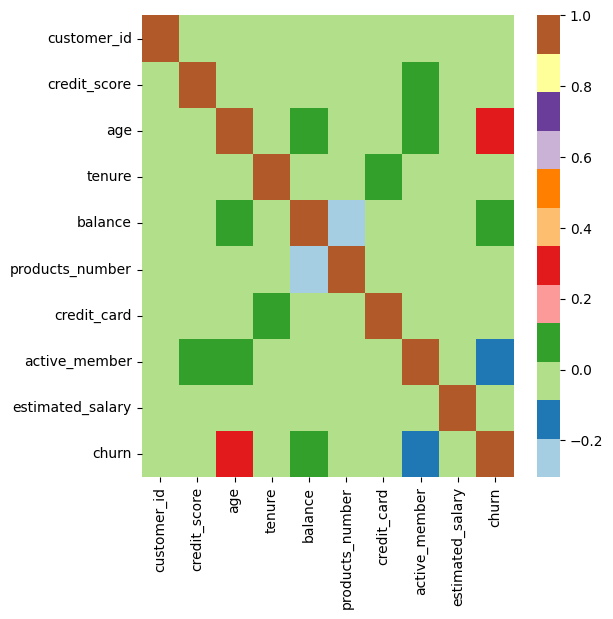

In [66]:
plt.figure(figsize=(6,6))

sns.heatmap(data.corr(numeric_only=True),cmap='Paired')
